# Trabalho 1 - Snakes and Ladders

Felipe Souza Tanios, RA 155330

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plays = 200
board_size = 100
dice = 6

mobility_dict = {
        1  :38,
        4  :14,
        9  :31,
        21 :42,
        28 :84,
        36 :44,
        51 :67,
        71 :91,
        80 :100,
        98 :78,
        95 :75,
        93 :73,
        87 :24,
        64 :60,
        62 :19,
        56 :53,
        49 :11,
        48 :26,
        16 :6
}

In [14]:
results = np.zeros((plays, board_size), dtype = np.float64)

for i in range(len(results)):
    for j in range(len(results[i])):
        
        if i == 0:
            if j < dice:
                results[i][j] = 1/dice
        if i > 0:
            results[i][j] += sum([(1/dice)*results[i-1][j-(k+1)] for k in range(dice) if j-(k+1)>=0])

        #the jumping part
        if j+1 in mobility_dict.keys():
            results[i][(mobility_dict[j+1])-1] +=  results[i][j]
            results[i][j] = 0
    

In [15]:
chance_to_win = []
cumulative_chance = []
for result in results:
#     with the following line we can see numeric issues
    print(np.sum(result))
    chance_to_win.append(result[-1])
    cumulative_chance.append(sum(chance_to_win))


1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9995927640603565
0.9961794838820299
0.9883155832444237
0.9767929263461274
0.9619895950864603
0.9436978567066059
0.922645352707725
0.900129055336921
0.8767853165722778
0.8524437857536771
0.826843837646624
0.8001470739373578
0.7728263602610946
0.7452971241535822
0.7177672021822857
0.6903593384342992
0.6632548994574723
0.6366914972042806
0.6108674731387655
0.585880865811313
0.561749496153956
0.5384670053873796
0.516036791679317
0.49446906301743054
0.47376321683872735
0.45389970796755874
0.43484650593700436
0.4165704003324702
0.3990431300675957
0.38224038383526987
0.3661379619914653
0.3507096154363988
0.3359277148281327
0.3217651325056499
0.308196430265428
0.29519778054660417
0.28274626415885445
0.2708193869251701
0.25939511721249436
0.2484522004794735
0.2379703836301593
0.2279303997681972
0.2183138095753649
0.2091028649415083
0.20028047246200978
0.19183022312489245
0.18373641650932065
0.17598404215960664
0.1685587302970289
0.16144670

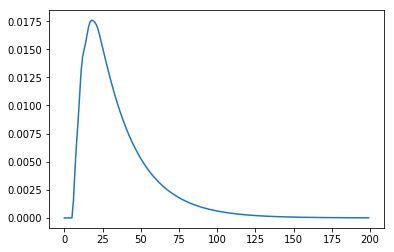

<function matplotlib.pyplot.show(*args, **kw)>

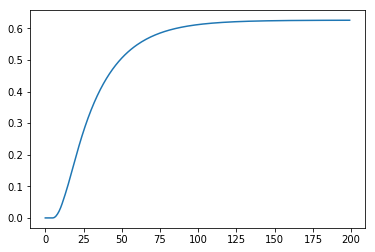

In [16]:
plt.plot(chance_to_win)
plt.show()
plt.plot(cumulative_chance)
plt.show